In [1]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adadelta, Adam, Adamax, Adagrad, RMSprop, SGD
import matplotlib.pyplot as plt

# Downloading the dataset
If you have not downloaded the dataset yet, run the following cell. If you have already done this, you can skip this step.

In [2]:
!mkdir ./data
!mkdir ./data2
!wget -O ./data/fer2013.csv https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv

# source https://www.kaggle.com/davidvictor/face-classification/notebook

--2022-01-01 13:10:27--  https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/n8bninud94blch4/fer2013.csv [following]
--2022-01-01 13:10:27--  https://www.dropbox.com/s/raw/n8bninud94blch4/fer2013.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3fa51513f7609467d3d9f45331.dl.dropboxusercontent.com/cd/0/inline/Bc_uzLcVHdS6xVwSS7n0jl0bjmj4c41pEqDYPJrq-wbICjhCylS7z6xzbUXpv2oTc7yYN0_jgBxX-ZQZNvKXM2jETHbm9vyC3fbinV04Unc8GqlMuYdk4xNQSGvaOxmYGGhagn5fq238Wnxp9FmuICK2/file# [following]
--2022-01-01 13:10:27--  https://uc3fa51513f7609467d3d9f45331.dl.dropboxusercontent.com/cd/0/inline/Bc_uzLcVHdS6xVwSS7n0jl0bjmj4c41pEqDYPJrq-wbICjhCylS7z6xzbUXpv2oTc7yYN0_jgBxX-ZQZNvKXM2jETHbm9

In [3]:
fer_data = pd.read_csv("./data/fer2013.csv")

# dataset-format : x -> image matrix, y -> label
x_train = []
y_train = []
x_test = []
y_test = []
for index, row in fer_data.iterrows():
    k = row['pixels'].split(" ")
    if row['Usage'] == 'Training':
        x_train.append(np.array(k))
        y_train.append(row['emotion'])
    elif row['Usage'] == 'PublicTest':
        x_test.append(np.array(k))
        y_test.append(row['emotion'])

print(len(x_train))
print(len(x_test))

# source : https://www.analyticsvidhya.com/blog/2021/11/facial-emotion-detection-using-cnn/

28709
3589


In [4]:
# transform the List object to nparray

x_train = np.array(x_train, dtype='float64')
y_train = np.array(y_train, dtype='float64')
x_test = np.array(x_test, dtype='float64')
y_test = np.array(y_test, dtype='float64')

# Format the array to a 48*48 matrix
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)

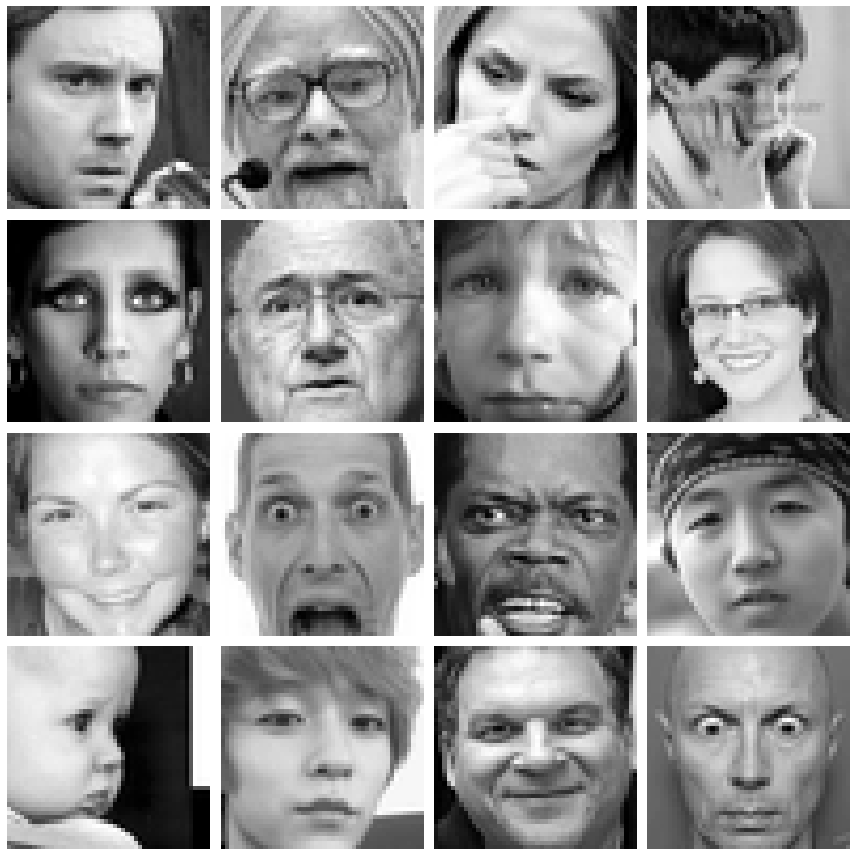

In [5]:
plt.style.use('ggplot')

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i].reshape((48, 48)), cmap="gray")
    plt.axis('off')
    plt.tight_layout()

# Building Facial Emotion Detection Model using CNN
Designing the CNN model for emotion detection.

We are creating blocks using Conv2D layer, Batch-Normalization, Max-Pooling2D, Dropout, Flatten, and then stacking them together and at the end-use Dense Layer for output.

In [ ]:
model = Sequential()
# Layer 1
model.add(Conv2D(32,(3,3),padding='same', input_shape=(48, 48, 1), activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #reduce the spatial dimensions of the output volume
model.add(Dropout(0.25))
# Layer 2
model.add(Conv2D(64,(3,3),padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Layer 3
model.add(Conv2D(128,(3,3),padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Layer 5
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Layer 6
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Layer 7
model.add(Dense(7, activation='softmax', kernel_initializer='he_uniform'))

summary = model.summary()

model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', # multi class classification problem
    metrics = ['accuracy'])

print(summary)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                      

In [ ]:
model.save_weights("./data/weights.h5")

# Fitting tho model with training and testing data

In [ ]:
checkpoint = ModelCheckpoint('./data/checkpoint.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [earlystop,checkpoint,reduce_learning_rate]

In [ ]:
history = model.fit(x_train, y_train, batch_size=45, epochs=50, callbacks=callbacks_list, validation_split=0.1)

Epoch 1/50
575/575 [==============================] - ETA: 0s - loss: 2.1467 - accuracy: 0.2499
Epoch 00001: val_accuracy improved from -inf to 0.38210, saving model to ./data/checkpoint.h5
575/575 [==============================] - 22s 34ms/step - loss: 2.1467 - accuracy: 0.2499 - val_loss: 1.5850 - val_accuracy: 0.3821 - lr: 0.0010
Epoch 2/50
573/575 [============================>.] - ETA: 0s - loss: 1.5975 - accuracy: 0.3820
Epoch 00002: val_accuracy improved from 0.38210 to 0.46917, saving model to ./data/checkpoint.h5
575/575 [==============================] - 19s 33ms/step - loss: 1.5976 - accuracy: 0.3820 - val_loss: 1.3603 - val_accuracy: 0.4692 - lr: 0.0010
Epoch 3/50
573/575 [============================>.] - ETA: 0s - loss: 1.4422 - accuracy: 0.4440
Epoch 00003: val_accuracy improved from 0.46917 to 0.50435, saving model to ./data/checkpoint.h5
575/575 [==============================] - 19s 33ms/step - loss: 1.4422 - accuracy: 0.4441 - val_loss: 1.2811 - val_accuracy: 0.5044

# Saving and evaluating the model

In [ ]:
model.save('./data/output')
model.load_weights('./data/checkpoint.h5')
eval = model.evaluate(x_test, y_test, verbose=1)
# TODO : summarize_diagnosis to pyplot as in : https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

INFO:tensorflow:Assets written to: ./data/output/assets
113/113 [==============================] - 1s 11ms/step - loss: 1.0432 - accuracy: 0.6135


# Plotting

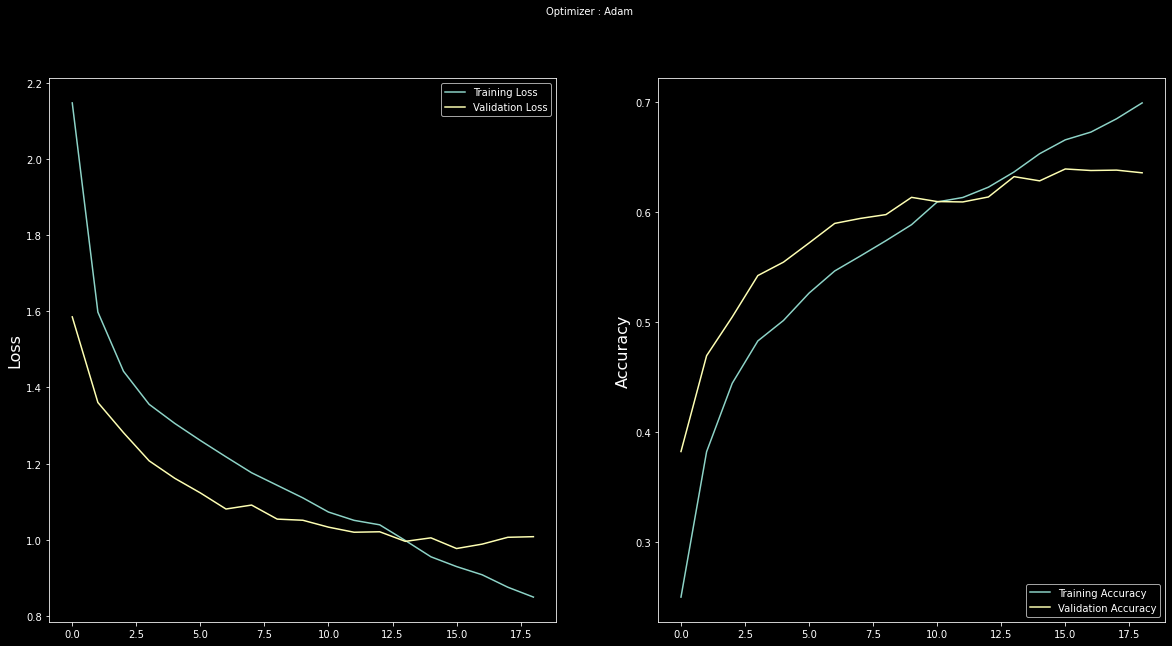

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Claudia (Schiffer)

In [ ]:
class_amount = 7
Claudia = Sequential()

#1st convolution layer
Claudia.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
Claudia.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
Claudia.add(Conv2D(64, (3, 3), activation='relu'))
Claudia.add(Conv2D(64, (3, 3), activation='relu'))
Claudia.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
Claudia.add(Conv2D(128, (3, 3), activation='relu'))
Claudia.add(Conv2D(128, (3, 3), activation='relu'))
Claudia.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

Claudia.add(Flatten())

#fully connected neural networks
Claudia.add(Dense(1024, activation='relu'))
Claudia.add(Dropout(0.2))
Claudia.add(Dense(1024, activation='relu'))
Claudia.add(Dropout(0.2))
Claudia.add(Dense(class_amount, activation='softmax'))

summary = Claudia.summary()

Claudia.compile(
    optimizer = 'adagrad', 
    loss = 'sparse_categorical_crossentropy', # multi class classification problem
    metrics = ['accuracy'])

Claudia.save_weights("./data2/weights.h5")

checkpoint2 = ModelCheckpoint('./data2/checkpoint.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)
earlystop2 = EarlyStopping(monitor='val_accuracy',
                          min_delta=0,
                          patience=7,
                          verbose=1,
                          restore_best_weights=True
                          )
reduce_learning_rate2 = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list2 = [earlystop2,checkpoint2,reduce_learning_rate2]

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 44, 44, 64)        1664      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 18, 18, 64)        36928     
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 average_pooling2d_8 (Averag  (None, 7, 7, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_23 (Conv2D)          (None, 5, 5, 128)        

In [ ]:
historia = Claudia.fit(x_train, y_train, batch_size=45, epochs=50, callbacks=callbacks_list2, validation_split=0.1)

Epoch 1/50
572/575 [============================>.] - ETA: 0s - loss: 1.8243 - accuracy: 0.2443
Epoch 00001: val_accuracy improved from -inf to 0.28109, saving model to ./data2/checkpoint.h5
575/575 [==============================] - 12s 20ms/step - loss: 1.8242 - accuracy: 0.2442 - val_loss: 1.7890 - val_accuracy: 0.2811 - lr: 0.0010
Epoch 2/50
572/575 [============================>.] - ETA: 0s - loss: 1.7742 - accuracy: 0.2727
Epoch 00002: val_accuracy did not improve from 0.28109
575/575 [==============================] - 11s 19ms/step - loss: 1.7738 - accuracy: 0.2732 - val_loss: 1.7414 - val_accuracy: 0.2557 - lr: 0.0010
Epoch 3/50
573/575 [============================>.] - ETA: 0s - loss: 1.7119 - accuracy: 0.3199
Epoch 00003: val_accuracy improved from 0.28109 to 0.32915, saving model to ./data2/checkpoint.h5
575/575 [==============================] - 11s 19ms/step - loss: 1.7116 - accuracy: 0.3200 - val_loss: 1.7304 - val_accuracy: 0.3292 - lr: 0.0010
Epoch 4/50
573/575 [======

In [ ]:
Claudia.save('./data2/output')
Claudia.save_weights("./data2/weights.h5")
Claudia.load_weights('./data2/checkpoint.h5')
eval2 = Claudia.evaluate(x_test, y_test, verbose=1)

INFO:tensorflow:Assets written to: ./data2/output/assets
113/113 [==============================] - 1s 8ms/step - loss: 1.3238 - accuracy: 0.5026


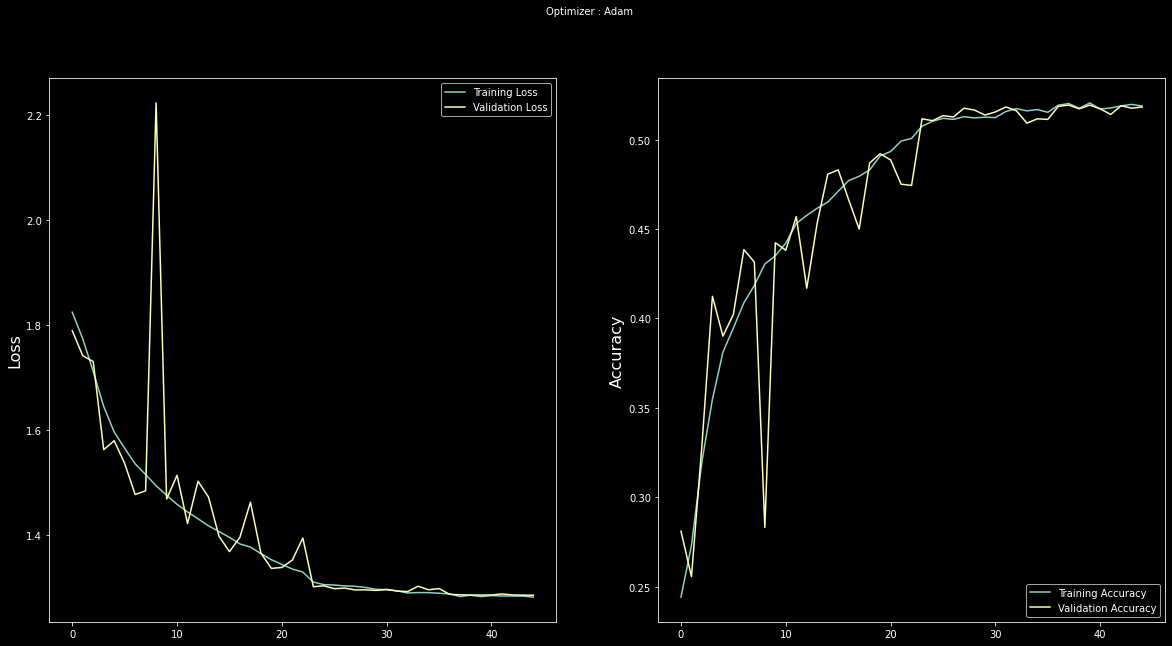

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(historia.history['loss'], label='Training Loss')
plt.plot(historia.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(historia.history['accuracy'], label='Training Accuracy')
plt.plot(historia.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()